In [1]:
#importing neccasary modules for data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', color_codes=True)
#loading the csv file
weather = pd.read_csv("weatherHistory.csv")
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
#clean the data 
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [3]:
#converting the nan data using median based inputation
weather.groupby('Precip Type').size()

Precip Type
rain    85224
snow    10712
dtype: int64

In [4]:
#check for duplicates
weather = weather.drop_duplicates()

## Since Model will be overfitted, we reduce the number of data by droping the null/nan values

In [5]:
weather=weather.dropna()

In [6]:
weather.groupby('Precip Type').size()

Precip Type
rain    85200
snow    10712
dtype: int64

In [7]:
weather.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


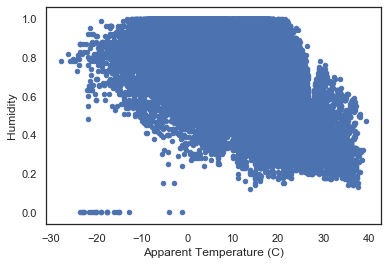

In [8]:
#data vizualization
weather.plot(kind='scatter',x='Apparent Temperature (C)', y='Humidity')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


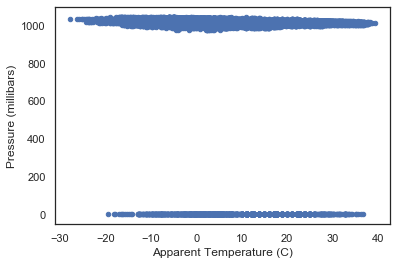

In [9]:
weather.plot(kind='scatter',x='Apparent Temperature (C)', y='Pressure (millibars)')

In [10]:
#Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed

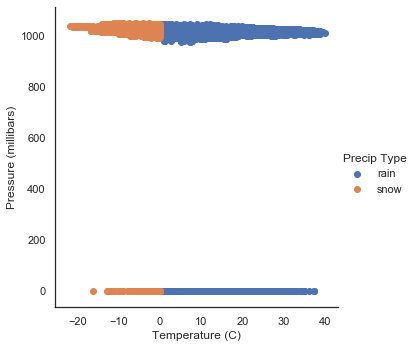

In [11]:
sns.FacetGrid(weather, hue = 'Precip Type', size=5) \
    .map(plt.scatter, 'Temperature (C)','Pressure (millibars)') \
    .add_legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


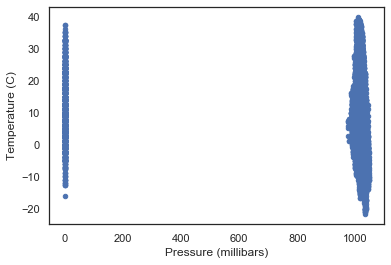

In [12]:
weather.plot(kind='scatter',x='Pressure (millibars)', y='Temperature (C)')

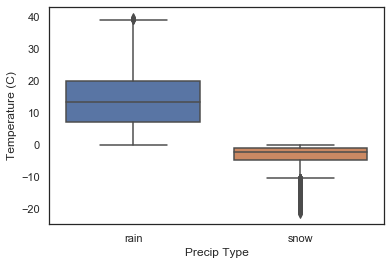

In [13]:
sns.boxplot(x='Precip Type', y='Temperature (C)', data=weather)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


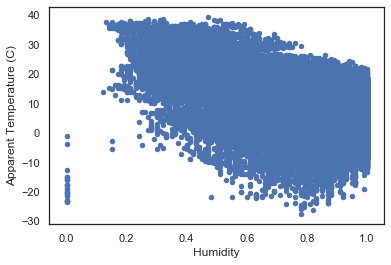

In [14]:
weather.plot(kind='scatter',x='Humidity', y='Apparent Temperature (C)')

In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.0+ MB


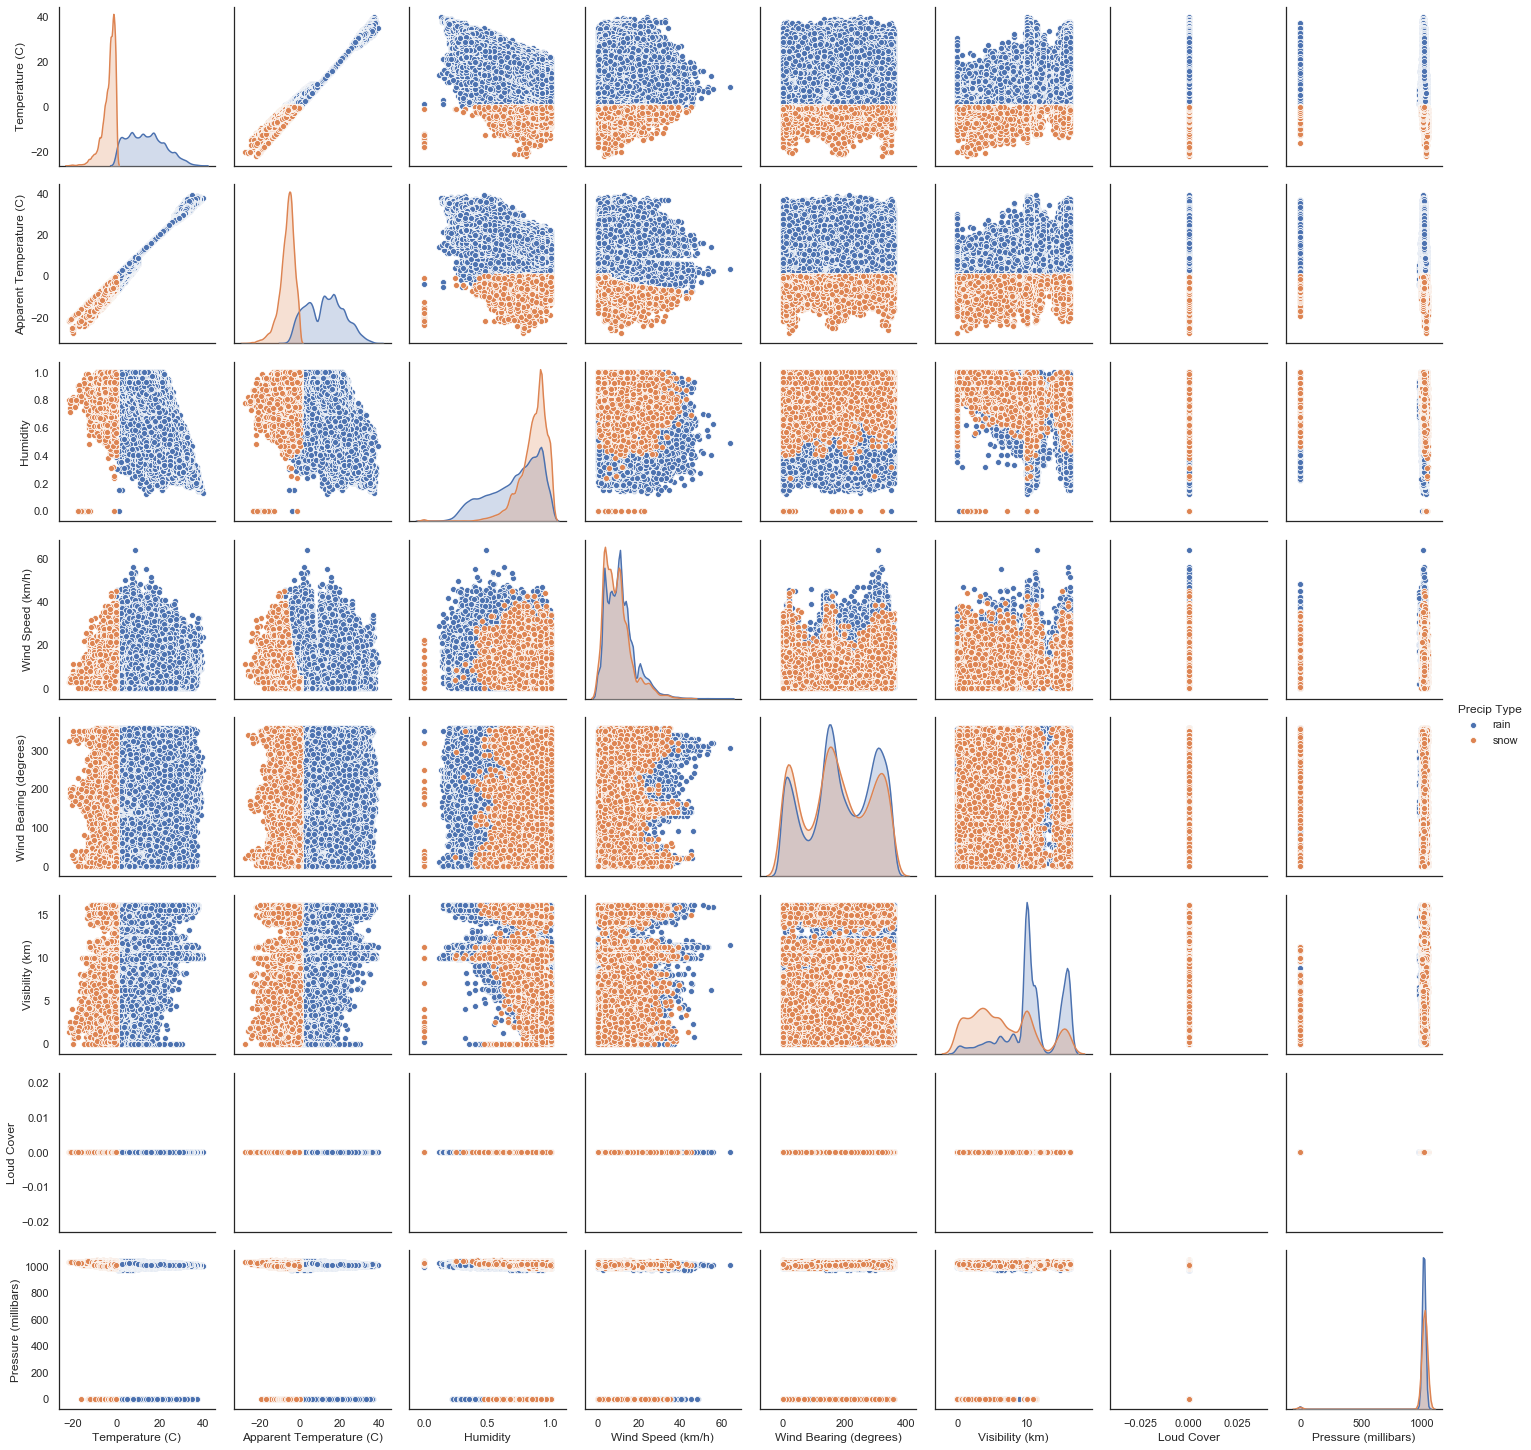

In [16]:
sns.pairplot(weather.drop('Formatted Date', axis=1), hue='Precip Type')

### loud cover in the graph does not impact the output
#### so we can delete the column 

In [17]:
le=LabelEncoder()
weather['Summary']=le.fit_transform(weather['Summary'])

In [18]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,19,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,19,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,19,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  int32  
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), int32(1), object(3)
memory usage: 11.6+ MB


In [20]:
weather.describe()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.0,95912.000000
mean,16.015514,11.937975,10.859194,0.734844,10.806764,187.506986,10.362306,0.0,1003.146959
std,4.354232,9.569620,10.716711,0.195717,6.920504,107.378309,4.174204,0.0,117.291484
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,17.000000,4.594444,2.272222,0.600000,5.812100,116.000000,8.355900,0.0,1011.890000
50%,18.000000,12.022222,12.022222,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,19.000000,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,26.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


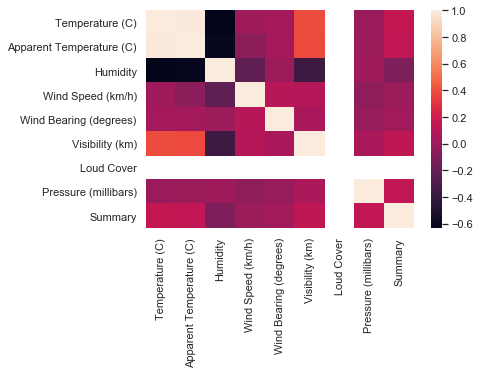

In [21]:
# reposition of the index
col = list(weather)
col.insert(-1, col.pop(col.index('Summary')))
weather = weather.reindex(columns= col)

# coorrelation heatmap
corr = weather.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [22]:
weather.drop(['Formatted Date','Loud Cover','Daily Summary','Wind Bearing (degrees)'],axis=1 , inplace=True)

In [23]:
#we need to split the data set
x=weather.iloc[:,:-1]
y=weather.iloc[:,-1]

In [24]:
weather["Precip Type"].value_counts()

rain    85200
snow    10712
Name: Precip Type, dtype: int64

In [25]:
# dropping Apparent Temperature because the correlation between temperature and temperature is almost equal to 1
x.drop(['Apparent Temperature (C)','Precip Type'],axis=1,inplace=True)
x

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51
...,...,...,...,...,...
96448,26.016667,0.43,10.9963,16.1000,1014.36
96449,24.583333,0.48,10.0947,15.5526,1015.16
96450,22.038889,0.56,8.9838,16.1000,1015.66
96451,21.522222,0.60,10.5294,16.1000,1015.95


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_columns=x.columns
print('x_train and x_test shape',x_train.shape,'&',x_test.shape)
print('y_train and y_test shape',y_train.shape,'&',y_test.shape)

x_train and x_test shape (67138, 5) & (28774, 5)
y_train and y_test shape (67138,) & (28774,)


In [27]:
x_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
36700,-4.422222,0.92,13.6528,11.6886,1017.52
80869,1.116667,0.94,2.7853,0.0000,1031.33
58216,17.761111,0.30,11.3505,10.3684,1020.92
32762,12.222222,0.86,0.0000,15.1340,1018.20
38045,-2.800000,0.92,0.5796,6.0697,1017.99
...,...,...,...,...,...
21440,19.633333,0.67,13.3952,9.9820,1016.48
73516,-4.988889,0.92,3.2200,3.1717,1005.51
50081,25.033333,0.58,7.4865,11.2700,1018.39
5192,-2.200000,0.89,38.0765,0.3542,1014.71


In [28]:
# normalizing the dataset
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[-1.71125467e+00,  9.45128095e-01,  4.10924024e-01,
         3.18969574e-01,  1.21484368e-01],
       [-1.13220846e+00,  1.04727688e+00, -1.16049077e+00,
        -2.47844350e+00,  2.40105403e-01],
       [ 6.07834099e-01, -2.22148434e+00,  7.80168903e-02,
         3.00831799e-03,  1.50688678e-01],
       ...,
       [ 1.36808634e+00, -7.91401304e-01, -4.80708368e-01,
         2.18786737e-01,  1.28957235e-01],
       [-1.47893924e+00,  7.91904913e-01,  3.94253326e+00,
        -2.39367341e+00,  9.73478645e-02],
       [-4.60236084e-01,  1.04727688e+00, -1.21403527e+00,
        -7.98454381e-01,  2.03342331e-01]])

In [29]:
x_train=pd.DataFrame(x_train,columns=x_columns)
x_test=pd.DataFrame(x_test,columns=x_columns)
x_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,-1.711255,0.945128,0.410924,0.318970,0.121484
1,-1.132208,1.047277,-1.160491,-2.478443,0.240105
2,0.607834,-2.221484,0.078017,0.003008,0.150689
3,0.028788,0.638682,-1.563239,1.143551,0.127325
4,-1.541664,0.945128,-1.479430,-1.025792,0.125521
...,...,...,...,...,...
67133,0.803560,-0.331732,0.373676,-0.089468,0.112551
67134,-1.770495,0.945128,-1.097634,-1.719366,0.018324
67135,1.368086,-0.791401,-0.480708,0.218787,0.128957
67136,-1.478939,0.791905,3.942533,-2.393673,0.097348


In [30]:
# training and testing the model using Navie Bayeas
nb=GaussianNB()
# train the model
nb.fit(x_train,y_train)
# testing the model 
y_predictions=nb.predict(x_test)# training and testing the model using Navie Bayeas
nb=GaussianNB()
# train the model
nb.fit(x_train,y_train)
# testing the model 
y_predictions=nb.predict(x_test)

In [31]:
sklearn.metrics.accuracy_score(y_test,y_predictions)

0.46979912420935566

In [32]:
# training and testing the model using RandomForestClassifier
rf= RandomForestClassifier()
# train the model
rf.fit(x_train,y_train)
# testing the model 
y_predictions=rf.predict(x_test)

In [33]:
# # checking the accuarcy of the predication
sklearn.metrics.accuracy_score(y_test,y_predictions)

0.5598804476263294

In [34]:
#printing out the feature importances assigned by the RandomforestClassifier while training hte model 
print(np.array(x_columns))
print(rf.feature_importances_)

['Temperature (C)' 'Humidity' 'Wind Speed (km/h)' 'Visibility (km)'
 'Pressure (millibars)']
[0.20851307 0.15125961 0.19889143 0.23147804 0.20985786]
